In [30]:
import pandas as pd
import sqlite3
import regex as re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [31]:
df = pd.read_csv("emails.csv")

In [32]:
df.head(10)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


In [33]:
print("Spam count :",df[df["spam"]==1].shape[0])

Spam count : 1368


In [34]:
print("not spam count :",df[df["spam"]==0].shape[0])

not spam count : 4360


In [35]:
print(df.shape)

(5728, 2)


In [36]:
df["spam"] = df["spam"].astype(int)

In [37]:
df = df.drop_duplicates()
df = df.reset_index(inplace = False)[['text','spam']]

In [38]:
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5690,Subject: re : research and development charges...,0
5691,"Subject: re : receipts from visit jim , than...",0
5692,Subject: re : enron case study update wow ! a...,0
5693,"Subject: re : interest david , please , call...",0


In [39]:
#cleaning
clean_desc = []
for w in range(len(df.text)):
  desc = df['text'][w].lower()

  #removing punctuations
  desc = re.sub('[^a-zA-Z]',' ',desc)

  #remove tags
  desc = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",desc)

  #remove digits
  desc = re.sub("(\\d|\\W)+"," ",desc)

  clean_desc.append(desc)

In [40]:
df['text']=clean_desc

In [41]:
df.head(3)

,text,spam
0,subject naturally irresistible your corporate ...,1
1,subject the stock trading gunslinger fanny is ...,1
2,subject unbelievable new homes made easy im wa...,1


In [42]:
stop_words = ['is','you','your','and', 'the', 'to', 'from', 'or', 'I', 'for', 'do', 'get', 'not', 'here', 'in', 'im', 'have', 'on', 're', 'new', 'subject']

In [43]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


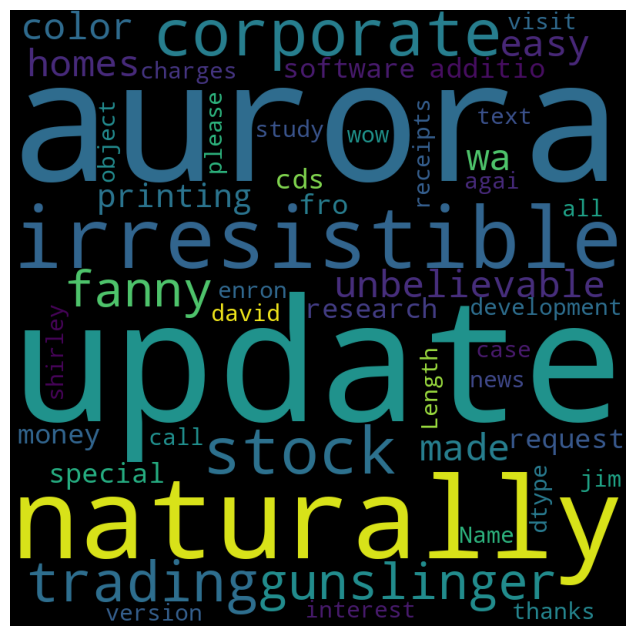

In [44]:
wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', stopwords = stop_words, max_words = 1000
                      , min_font_size = 20).generate(str(df['text']))
#plot the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

spam and not spam wordclouds

In [45]:
#spam
df1 = df[df['spam']==1]

In [46]:
df1

,text,spam
0,subject naturally irresistible your corporate ...,1
1,subject the stock trading gunslinger fanny is ...,1
2,subject unbelievable new homes made easy im wa...,1
3,subject color printing special request additio...,1
4,subject do not have money get software cds fro...,1
...,...,...
1363,subject are you ready to get it hello viagra i...,1
1364,subject would you like a gas card don t let th...,1
1365,subject immediate reply needed dear sir i am d...,1
1366,subject wanna see me get fisted fist bang will...,1


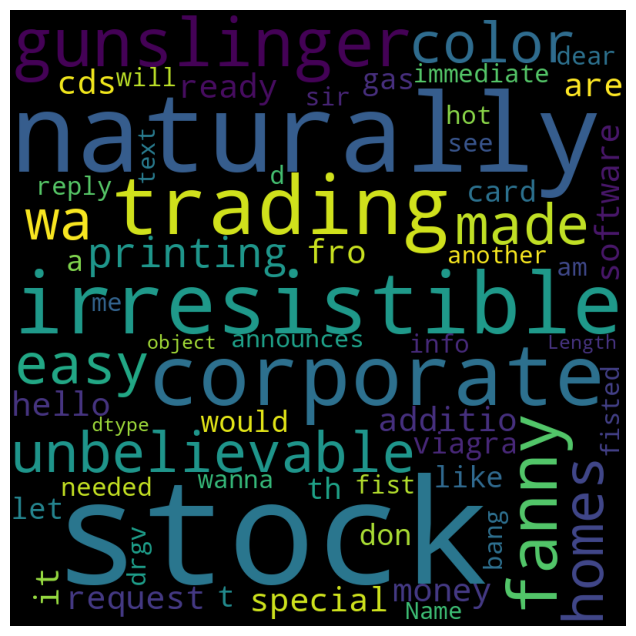

In [47]:
wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', stopwords = stop_words, max_words = 1000
                      , min_font_size = 20).generate(str(df1['text']))
#plot the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [48]:
#not spam
df2 = df[df['spam']==0]

In [49]:
df2

,text,spam
1368,subject hello guys i m bugging you for your co...,0
1369,subject sacramento weather station fyi forward...,0
1370,subject from the enron india newsdesk jan th n...,0
1371,subject re powerisk your invitation angelika t...,0
1372,subject re resco database and customer capture...,0
...,...,...
5690,subject re research and development charges to...,0
5691,subject re receipts from visit jim thanks agai...,0
5692,subject re enron case study update wow all on ...,0
5693,subject re interest david please call shirley ...,0


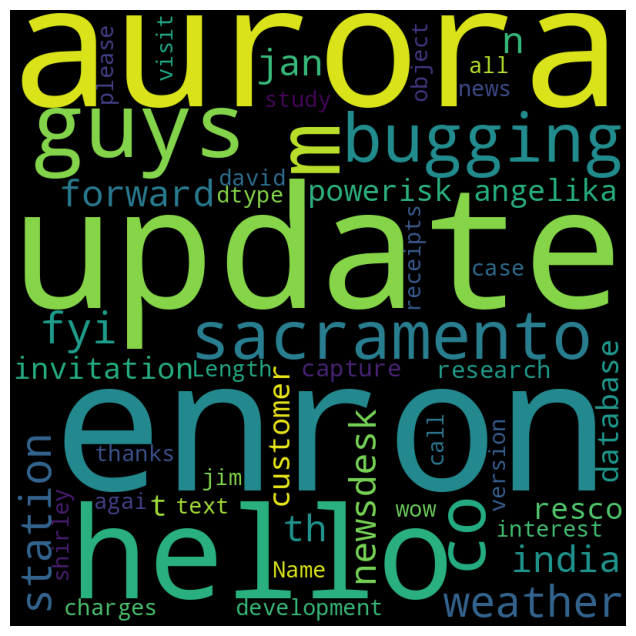

In [50]:
wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', stopwords = stop_words, max_words = 1000
                      , min_font_size = 20).generate(str(df2['text']))
#plot the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()